<a href="https://colab.research.google.com/github/GuadalupeLopezAsc/Modulo_ll_Modelos_Estadisticos/blob/main/Ejercicio_leyes_dado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Elaborado por**: Guadalupe López Ascencio.

### Diccionarios

Un diccionario es un objeto que se crea a partir de algo que se llama "llave" y nos arroja "valores":

\{ key : values \}

In [1]:
import itertools
from itertools import product #para el prodcuto cartesiano
from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np

Primero vamos a crear una función de probabilidad global:

Nota. Realizar esto para cada valor de $n$ quita tiempo. Vamos a hacer esto más rápido utilizando diccionarios.

[Para collections ir a](https://docs.python.org/es/3/library/collections.html)

Vamos a añadir elementos a un diccionario que esta vacio

In [2]:
import pandas as pd

## Ejercicios

1.   Documenta tu colab
2.   Calcular la ley de las siguientes variables aleatorias
     *   La diferencia de las caras es mayor que 1
     *   La suma de las caras sea par
3. Verifica en cada caso, que
   $$\sum_{k\in R_{X}}\mathbb{P}(X=k) = 1$$
4. Gráfica y calcula la función de distribución de la v.a. S (la suma de los resultados es n)   
5. Sube tu notebook a GitHub


In [3]:
def prob_dif_mayor_que_uno():
    """
    Calcula la probabilidad de que la diferencia entre los resultados de dos dados sea mayor que 1.
    """

    # Definimos el espacio muestral (todas las combinaciones posibles al lanzar dos dados)
    L = [i for i in range(1,7)] #Lista por comprensión
    espacio_muestral = set(product(L, repeat=2))  # Todas las combinaciones posibles (tuplas)

    # Inicializamos el contador de casos favorables
    favorables = 0

    # Recorremos todas las combinaciones posibles y contar cuántas tienen diferencia mayor a 1
    for (a, b) in espacio_muestral:
        if abs(a - b) > 1:  # Comprobar si la diferencia entre los dos valores es mayor que 1
            favorables += 1

    # Calculamos la probabilidad dividiendo los casos favorables por el total del espacio muestral
    total = len(espacio_muestral)
    probabilidad = favorables / total

    return probabilidad


In [4]:
# Llamamos a la función para obtener el resultado
resultado = prob_dif_mayor_que_uno()
print("La probabilidad de que la diferencia sea mayor que 1 es:", resultado)

La probabilidad de que la diferencia sea mayor que 1 es: 0.5555555555555556


In [5]:
#Definimos la funcion para la calcular la probabilidad de que la suma de las caras sea par
def probabilidad_suma_par():
    """
    Calcula la probabilidad de que la suma de los resultados de dos dados sea par.
    """

    # 1. Definimos las caras del dado (cada dado tiene 6 caras, del 1 al 6)
    L = [i for i in range(1,7)] #Lista por comprensión

    # 2. Generamos el espacio muestral: todas las combinaciones posibles de lanzar dos dados
    combinaciones = list(product(L, repeat=2))  # Lista de tuplas con cada combinación posible de dos lanzamientos

    # 3. Inicializamos un contador para los casos en los que la suma es par
    casos_favorables = 0

    # 4. Recorremos cada combinación y verificar si la suma de los dos dados es par
    for (dado1, dado2) in combinaciones:
        if (dado1 + dado2) % 2 == 0:  # Verifica si la suma es divisible por 2 (es par)
            casos_favorables += 1  # Si la suma es par, incrementa el contador de casos favorables

    # 5. Calculamos la probabilidad como el cociente entre los casos favorables y el total de combinaciones
    total_combinaciones = len(combinaciones)
    probabilidad = casos_favorables / total_combinaciones  # Probabilidad de obtener una suma par

    return probabilidad

In [6]:
# Llamamos a la función para obtener el resultado
resultado = probabilidad_suma_par()
print("La probabilidad de que la suma de las caras de dos dados sea par es:", resultado)

La probabilidad de que la suma de las caras de dos dados sea par es: 0.5


In [7]:
#Primero vamos a crear a nuestro espacio muestral Omega
casos_posibles = [i for i in range(1,7)] #Lista por comprensión
#print(L)
Omega = set(product(casos_posibles, repeat=2))

In [8]:
combinaciones_y_sumas = {(i,j): i+j for i,j in Omega}
combinaciones_y_sumas

{(3, 4): 7,
 (4, 3): 7,
 (3, 1): 4,
 (5, 4): 9,
 (4, 6): 10,
 (5, 1): 6,
 (2, 2): 4,
 (1, 6): 7,
 (2, 5): 7,
 (1, 3): 4,
 (6, 2): 8,
 (6, 5): 11,
 (4, 2): 6,
 (4, 5): 9,
 (3, 3): 6,
 (5, 6): 11,
 (3, 6): 9,
 (5, 3): 8,
 (2, 4): 6,
 (1, 2): 3,
 (2, 1): 3,
 (1, 5): 6,
 (6, 1): 7,
 (6, 4): 10,
 (3, 2): 5,
 (4, 1): 5,
 (3, 5): 8,
 (5, 2): 7,
 (4, 4): 8,
 (5, 5): 10,
 (1, 1): 2,
 (1, 4): 5,
 (2, 3): 5,
 (2, 6): 8,
 (6, 6): 12,
 (6, 3): 9}

In [9]:
# Crear un diccionario por default para agrupar eventos
from collections import defaultdict
eventos_agrupados = defaultdict(set)
eventos_agrupados

defaultdict(set, {})

In [10]:
# Definir función de probabilidad
def probabilidad(A, Omega):
    return Fraction(len(A), len(Omega))

In [11]:
# Añadir al diccionario las combinaciones según la suma
for combinacion, suma in combinaciones_y_sumas.items():
    eventos_agrupados[suma].add(combinacion)  # Agrupar las combinaciones por la suma
eventos_agrupados

defaultdict(set,
            {7: {(1, 6), (2, 5), (3, 4), (4, 3), (5, 2), (6, 1)},
             4: {(1, 3), (2, 2), (3, 1)},
             9: {(3, 6), (4, 5), (5, 4), (6, 3)},
             10: {(4, 6), (5, 5), (6, 4)},
             6: {(1, 5), (2, 4), (3, 3), (4, 2), (5, 1)},
             8: {(2, 6), (3, 5), (4, 4), (5, 3), (6, 2)},
             11: {(5, 6), (6, 5)},
             3: {(1, 2), (2, 1)},
             5: {(1, 4), (2, 3), (3, 2), (4, 1)},
             2: {(1, 1)},
             12: {(6, 6)}})

In [12]:
# Aplicamos la ley de probabilidades para cada evento en el diccionario eventos_agrupados
ley_probabilidades = {suma: probabilidad(A, Omega) for suma, A in eventos_agrupados.items()}
ley_probabilidades

{7: Fraction(1, 6),
 4: Fraction(1, 12),
 9: Fraction(1, 9),
 10: Fraction(1, 12),
 6: Fraction(5, 36),
 8: Fraction(5, 36),
 11: Fraction(1, 18),
 3: Fraction(1, 18),
 5: Fraction(1, 9),
 2: Fraction(1, 36),
 12: Fraction(1, 36)}

In [13]:
# Verificamos que la suma de todas las probabilidades es igual a 1
suma_probabilidades = sum(ley_probabilidades.values())
print(f"La suma de las probabilidades es: {suma_probabilidades}")

# Verificar si la suma es igual a 1
if suma_probabilidades == 1:
    print("La suma de las probabilidades es igual a 1: \u2211_{k} P(X=k) = 1")
else:
    print(f"Error: La suma de las probabilidades no es 1, es {suma_probabilidades}")

La suma de las probabilidades es: 1
La suma de las probabilidades es igual a 1: ∑_{k} P(X=k) = 1


In [14]:
# Valores de S y sus probabilidades
valores_s = sorted(ley_probabilidades.keys())
densidades = [ley_probabilidades[n] for n in valores_s]


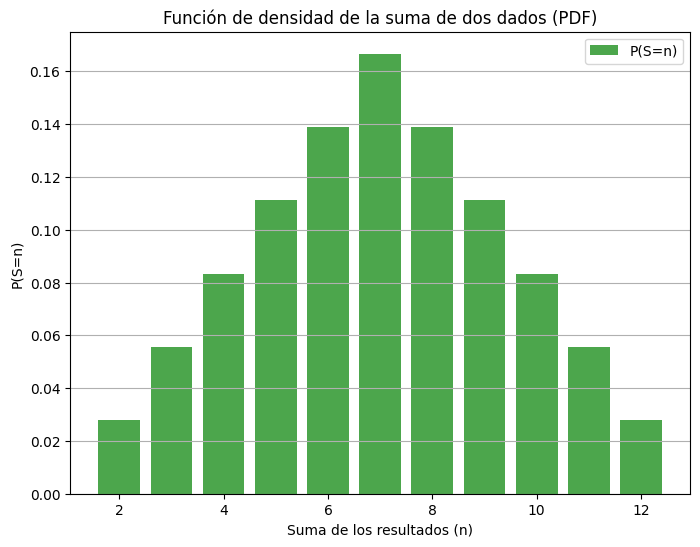

In [15]:
# Graficamos la función de densidad con barras
plt.figure(figsize=(8, 6))
plt.bar(valores_s, densidades, color='g', alpha=0.7, label='P(S=n)', width=0.8)

plt.xlabel('Suma de los resultados (n)')
plt.ylabel('P(S=n)')
plt.title('Función de densidad de la suma de dos dados (PDF)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [16]:
# Imprimimos la función de densidad para cada valor de S
for n, p in zip(valores_s, densidades):
    print(f"P(S={n}) = {p}")

P(S=2) = 1/36
P(S=3) = 1/18
P(S=4) = 1/12
P(S=5) = 1/9
P(S=6) = 5/36
P(S=7) = 1/6
P(S=8) = 5/36
P(S=9) = 1/9
P(S=10) = 1/12
P(S=11) = 1/18
P(S=12) = 1/36


In [17]:
# Calculamos la función de distribución acumulada (CDF) de S
valores_s = sorted(ley_probabilidades.keys())
cdf = []
suma_acumulada = 0

for n in valores_s:
    suma_acumulada += ley_probabilidades[n]
    cdf.append(suma_acumulada)



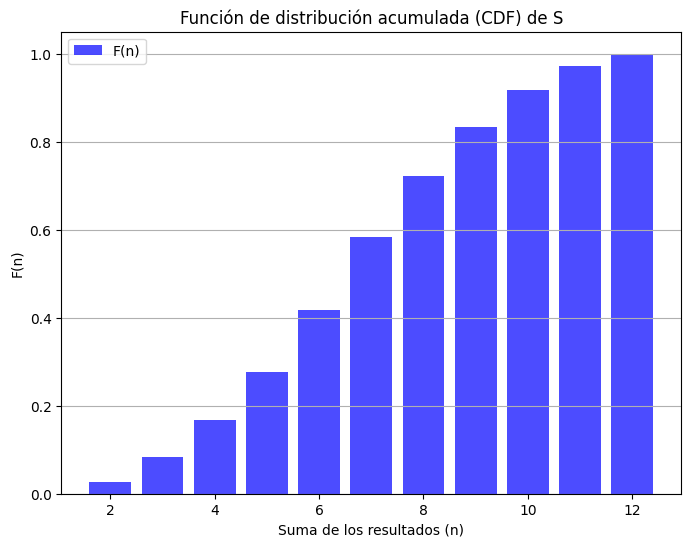

In [18]:
# Graficar la función de distribución acumulada con barras
plt.figure(figsize=(8, 6))
plt.bar(valores_s, cdf, color='b', alpha=0.7, label='F(n)', width=0.8)

# Etiquetas y título del gráfico
plt.xlabel('Suma de los resultados (n)')
plt.ylabel('F(n)')
plt.title('Función de distribución acumulada (CDF) de S')
plt.grid(True, axis='y')
plt.legend()
plt.show()


In [19]:
# Imprimimos la función de distribución acumulada para cada valor de S
for n, fn in zip(valores_s, cdf):
    print(f"F({n}) = {fn}")

F(2) = 1/36
F(3) = 1/12
F(4) = 1/6
F(5) = 5/18
F(6) = 5/12
F(7) = 7/12
F(8) = 13/18
F(9) = 5/6
F(10) = 11/12
F(11) = 35/36
F(12) = 1
